In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv(r'C:\Users\mico-\Documents\Data Science\data-science-practice\Decision Tree\processed_data.csv')
original_df = pd.read_csv(r'C:\Users\mico-\Documents\Data Science\data-science-practice\Decision Tree\heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            303 non-null    int64  
 1   alder                 303 non-null    int64  
 2   køn                   303 non-null    object 
 3   type_bryst_smerte     303 non-null    object 
 4   blodtryk_hvile        303 non-null    int64  
 5   kolesterol            303 non-null    int64  
 6   blodsukker_faste      303 non-null    object 
 7   ekg_hvile             303 non-null    object 
 8   max_hjerterytme       303 non-null    int64  
 9   angina_ved_træning    303 non-null    object 
 10  st_depresion          303 non-null    float64
 11  st_segment            303 non-null    object 
 12  blodkar_fluoroskopi   303 non-null    int64  
 13  thallium_stress_test  303 non-null    object 
 14  target                303 non-null    int64  
dtypes: float64(1), int64(7)

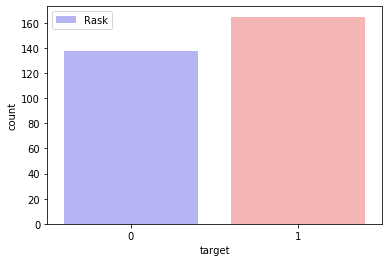

In [58]:
sns_plot = sns.countplot(x='target', data=df, palette='bwr')
fig = sns_plot.get_figure()
fig.savefig(r"C:\Users\mico-\Documents\Data Science\data-science-practice\Decision Tree\Target.png")

In [5]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Procentdel af patienter med hjertesygdom: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Procentdel af patienter uden hjertesygdom: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))
#Vi ser at der er tæt på en lige fordeling mellem patienter med og uden hjertsygdomme, hvilket er vigtig for modellens præsicion

Procentdel af patienter med hjertesygdom: 45.54%
Procentdel af patienter uden hjertesygdom: 54.46%


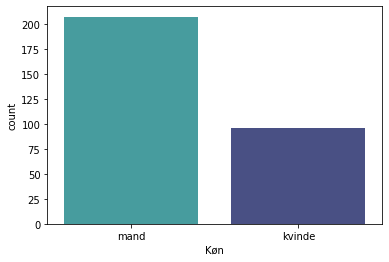

In [17]:
sns_countplot =sns.countplot(x='køn', data=df, palette="mako_r")
plt.xlabel("Køn")
plt.show()

fig = sns_countplot.get_figure()
fig.savefig(r"C:\Users\mico-\Documents\Data Science\data-science-practice\Decision Tree\FordelingAfKøn.png")
#Vi ser at der er en meget dårlig fordeling af mænd og kvinder i datasettet, det kan betyde at modellen vægter køns betyding forkert, særligt når det er et lille dataset

In [18]:
countFemale = len(df[df.køn == 'kvinde'])
countMale = len(df[df.køn == 'mand'])
print("Procentdel af kvindlige patienter: {:.2f}%".format((countFemale / (len(df.køn))*100)))
print("Procentdel af mandlige patienter: {:.2f}%".format((countMale / (len(df.køn))*100)))

Procentdel af kvindlige patienter: 31.68%
Procentdel af mandlige patienter: 68.32%


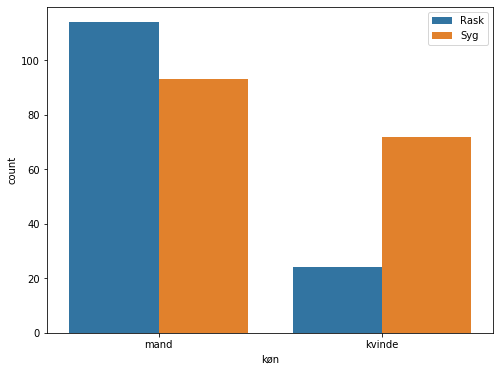

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="køn", hue="target", data=df)
plt.legend(["Rask", "Syg"])
plt.show()

fig = ax.get_figure()
fig.savefig(r"C:\Users\mico-\Documents\Data Science\data-science-practice\Decision Tree\FordelingAfSygdommePåKøn.png")

In [55]:
FemalesWithHD = df[(df.køn == 'kvinde') & (df.target == 1)]
FemalesWithoutHD = df[(df.køn == 'kvinde') & (df.target == 0)]

MalesWithHD = df[(df.køn == 'mand') & (df.target == 1)]
MalesWithoutHD = df[(df.køn == 'mand') & (df.target == 0)]

countFemale = len(df[df.køn == 'kvinde'])
countMale = len(df[df.køn == 'mand'])

print("Procentdel af kvindlige patienter med hjertesgydom: {:.2f}%".format((len(FemalesWithHD) / countFemale)*100))
print("Procentdel af kvindlige patienter uden hjertesgydom: {:.2f}%".format((len(FemalesWithoutHD) / countFemale)*100))

print("Procentdel af mandlige patienter med hjertesgydom: {:.2f}%".format((len(MalesWithHD) / countMale)*100))
print("Procentdel af mandlige patienter uden hjertesgydom: {:.2f}%".format((len(MalesWithoutHD) / countMale)*100))

Procentdel af kvindlige patienter med hjertesgydom: 75.00%
Procentdel af kvindlige patienter uden hjertesgydom: 25.00%
Procentdel af mandlige patienter med hjertesgydom: 44.93%
Procentdel af mandlige patienter uden hjertesgydom: 55.07%


In [8]:
original_df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


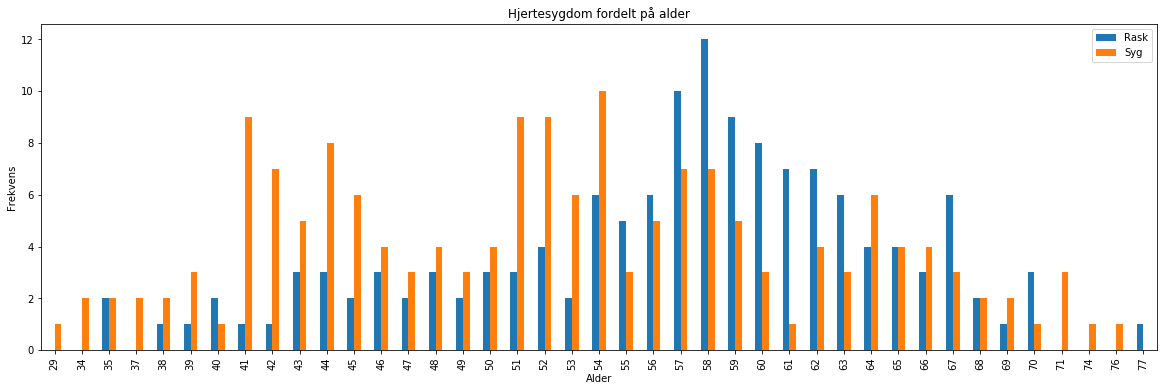

In [56]:
ax = pd.crosstab(df.alder,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Hjertesygdom fordelt på alder')
plt.xlabel('Alder')
plt.ylabel('Frekvens')
plt.legend(["Rask", "Syg"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()


fig = ax.get_figure()
fig.savefig(r"C:\Users\mico-\Documents\Data Science\data-science-practice\Decision Tree\FordelingAfSygdommePåAlder.png")

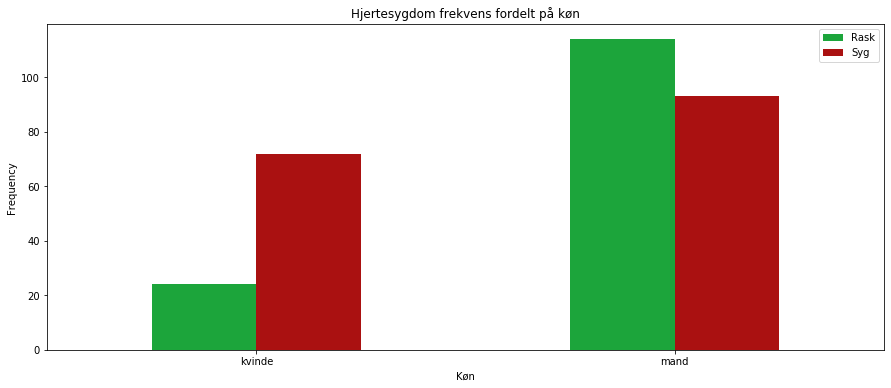

In [10]:
pd.crosstab(df.køn,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Hjertesygdom frekvens fordelt på køn')
plt.xlabel('Køn')
plt.xticks(rotation=0)
plt.legend(["Rask", "Syg"])
plt.ylabel('Frequency')
plt.show()
#Vi ser en stor over repræsentation af kvinder med hjertesygdomme